In [ ]:
!pip install google_streetview

  Created wheel for google-streetview: filename=google_streetview-1.2.9-cp36-none-any.whl size=9781 sha256=119f639f203c9eff98d2fe4654e7907a6b329a707ade688aa4bd515ee22a1856
  Stored in directory: /root/.cache/pip/wheels/e1/ce/c0/e90d7ee251659d215b7ab21a7cd80cfd65e1720fc3dca3b9ed
  Created wheel for kwconfig: filename=kwconfig-1.1.7-cp36-none-any.whl size=4981 sha256=e622e34e55fa190bbfa3ff0f63603ca34e8ab41c66d8967548fdc8efafbf4885
  Stored in directory: /root/.cache/pip/wheels/22/fa/82/fed4c9e2829a6210470b121673adddedf169b6319112b3ba20
Successfully built google-streetview kwconfig


In [ ]:
# note: alot of these dependencies are not relevant for this example
# from config import gkey
from geopy import geocoders
from geopy.geocoders import GoogleV3
import google_streetview.api
import json
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import time

In [ ]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('50,000 rows of data; each row contains 32 X 32 images with dept 3 for R, G, & B')
print()
print('y_train shape:', y_train.shape)
print('50,000 rows of data and 1 column')
print()
print('x_test shape:', x_test.shape)
print('10,000 rows of data with 32 by 32 images and depth of 3')
print()
print('y_test shape:', y_test.shape)
print('10,000 rows of data with 1 column')

x_train shape: (50000, 32, 32, 3)
50,000 rows of data; each row contains 32 X 32 images with dept 3 for R, G, & B

y_train shape: (50000, 1)
50,000 rows of data and 1 column

x_test shape: (10000, 32, 32, 3)
10,000 rows of data with 32 by 32 images and depth of 3

y_test shape: (10000, 1)
10,000 rows of data with 1 column


In [ ]:
# Take a look at the 11th image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

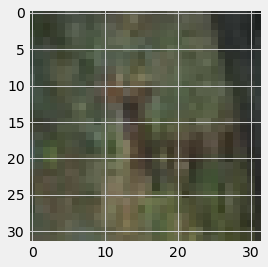

In [ ]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
y_train[:11]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4]], dtype=uint8)

In [ ]:
 #Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [ ]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


### Prepare Data for Neuro Network

In [ ]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])
print('corresponse to "4" for the deer')

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
corresponse to "4" for the deer


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#Create the models architecture
model = Sequential()

#Add the first layer (convolution layer to extract features from the input image and then create 32 5 X 5 relus (i.e., feature maps))
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer (creating a pooling layer with a 2 X 2 pixel filter to get the max element from the feature maps)
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer (reduces dimensionality to a linear array)
model.add(Flatten())

#Add a layer with 1,000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer (with a 50% rate)
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer (with a 50% rate)
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 357ms/step - loss: 1.8161 - accuracy: 0.3170 - val_loss: 1.5018 - val_accuracy: 0.4486
Epoch 2/10
157/157 [==============================] - 55s 353ms/step - loss: 1.4489 - accuracy: 0.4677 - val_loss: 1.3328 - val_accuracy: 0.5192
Epoch 3/10
157/157 [==============================] - 56s 354ms/step - loss: 1.3124 - accuracy: 0.5235 - val_loss: 1.2316 - val_accuracy: 0.5609
Epoch 4/10
157/157 [==============================] - 56s 354ms/step - loss: 1.1883 - accuracy: 0.5751 - val_loss: 1.1663 - val_accuracy: 0.5867
Epoch 5/10
157/157 [==============================] - 55s 352ms/step - loss: 1.1134 - accuracy: 0.6051 - val_loss: 1.0913 - val_accuracy: 0.6119
Epoch 6/10
157/157 [==============================] - 56s 354ms/step - loss: 1.0458 - accuracy: 0.6303 - val_loss: 1.0696 - val_accuracy: 0.6227
Epoch 7/10
157/157 [==============================] - 55s 353ms/step - loss: 0.9692 - accuracy: 0.6592 - val_loss: 0.9975 - val_ac

In [ ]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9233 - accuracy: 0.6789


0.6789000034332275

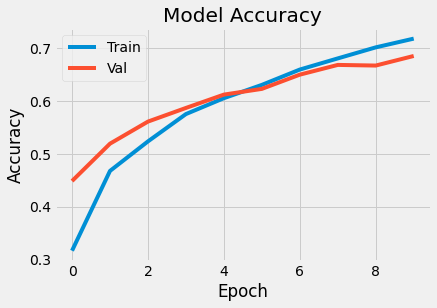

In [ ]:
#Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

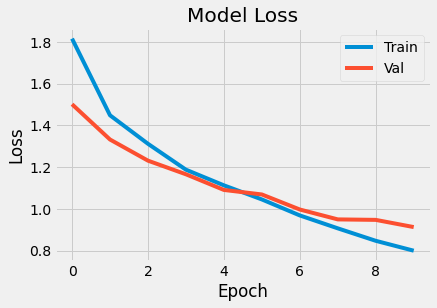

In [ ]:
#Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Test 1: Cat

In [ ]:
from google.colab import files
uploaded = files.upload()
# Choose the cat image

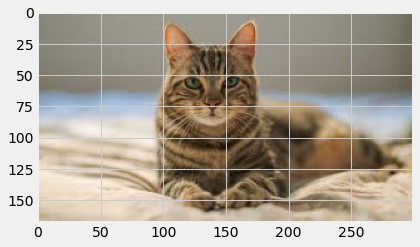

In [ ]:
#show the image
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

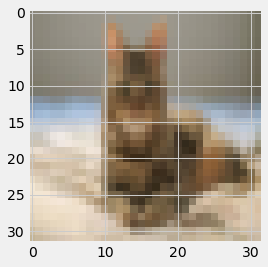

In [ ]:
# Resize the image so it is 32 X 32 pixels with depth 3
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[0.00536485, 0.00066581, 0.1861376 , 0.36725384, 0.03924303,
        0.15376396, 0.2257398 , 0.01028277, 0.00812316, 0.00342527]],
      dtype=float32)

In [ ]:
#Sort the predictions from least to greatest
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)
#highest probability is at index 3, next highest is at index 6

[3, 6, 2, 5, 4, 7, 8, 0, 9, 1]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 36.73 %
frog : 22.57 %
bird : 18.61 %
dog : 15.38 %
deer : 3.92 %


### Test 2: Plane

In [ ]:
from google.colab import files
uploaded = files.upload()
# Choose the plane image

Saving plane.jpg to plane (1).jpg


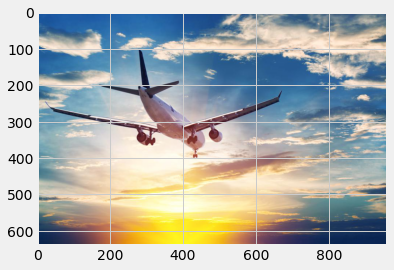

In [ ]:
#show the image
new_image = plt.imread('plane.jpg')
img = plt.imshow(new_image)

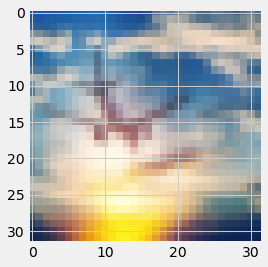

In [ ]:
# Resize the image so it is 32 X 32 pixels with depth 3
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[0.44697347, 0.00140417, 0.18439624, 0.01219598, 0.22296192,
        0.01078587, 0.00155356, 0.02282019, 0.09240877, 0.00449978]],
      dtype=float32)

In [ ]:
#Sort the predictions from least to greatest
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)
#highest probability is at index 3, next highest is at index 6

[0, 4, 2, 8, 7, 3, 5, 9, 6, 1]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

airplane : 44.7 %
deer : 22.3 %
bird : 18.44 %
ship : 9.24 %
horse : 2.28 %
